In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
gt = pd.read_csv('GlobalTemperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
gt.dropna(inplace = True)
gt.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [3]:
df = gt.reset_index(drop=True)

In [4]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...
1987,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


# VISUALIZATIONS

In [5]:
col = [gt.columns[0], gt.columns[2], gt.columns[4], gt.columns[6]]
col

['LandAverageTemperature',
 'LandMaxTemperature',
 'LandMinTemperature',
 'LandAndOceanAverageTemperature']

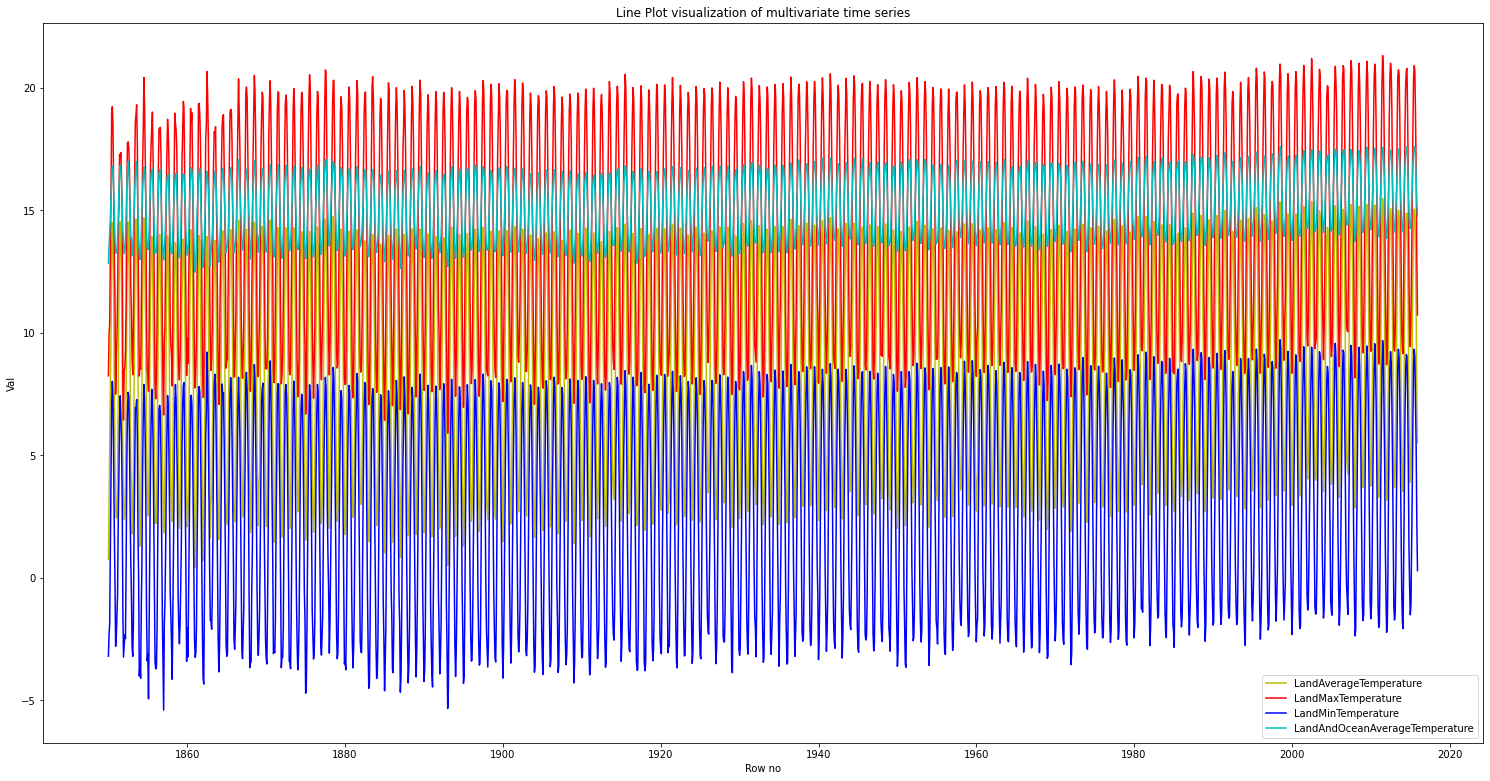

In [6]:
fig = plt.figure(figsize = (20, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(col[0], data = gt, color = 'y')
axes.plot(col[1], data = gt, color = 'r')
axes.plot(col[2], data = gt, color = 'b')
axes.plot(col[3], data = gt, color = 'c')
axes.set_title('Line Plot visualization of multivariate time series')
axes.set_xlabel('Row no')
axes.set_ylabel('Val')
axes.legend()
fig.savefig('Output/lineplot.png', bbox_inches = 'tight')

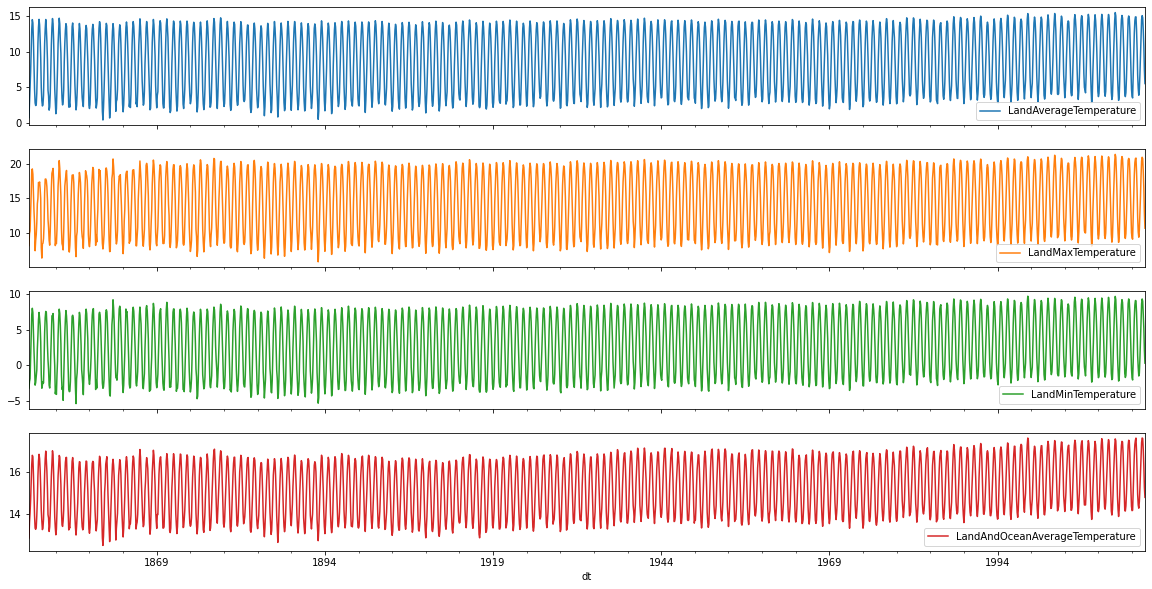

In [7]:
gt[col].plot(subplots=True, figsize=(20, 10))
plt.savefig('Output/Linesubplots.png', bbox_inches = 'tight')

C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

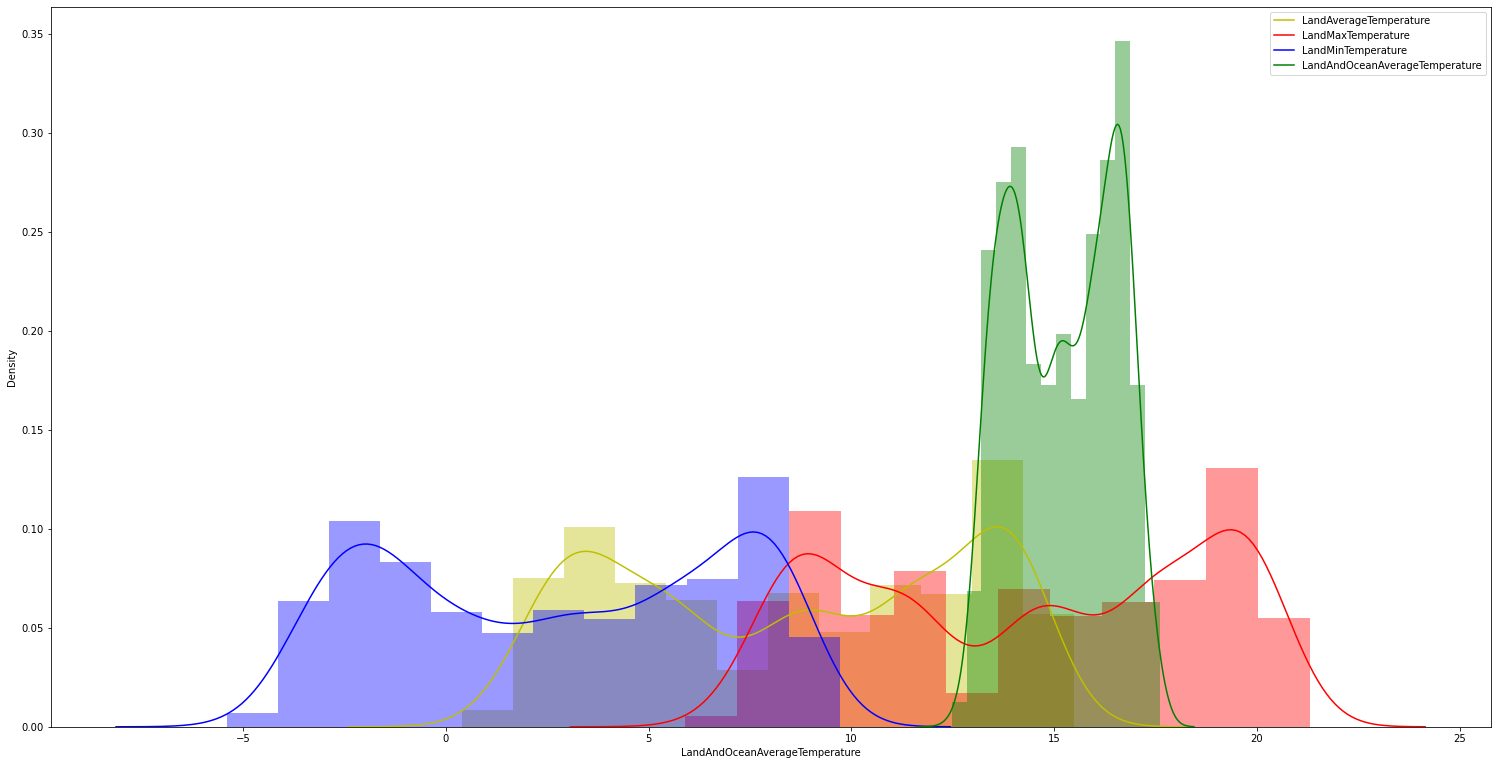

In [8]:
fig = plt.figure(figsize = (20, 10))
axes = fig.add_axes([0, 0, 1, 1])
sns.distplot(gt[col[0]], ax = axes, color = 'y')
sns.distplot(gt[col[1]], ax = axes, color = 'r')
sns.distplot(gt[col[2]], ax = axes, color = 'b')
sns.distplot(gt[col[3]], ax = axes, color = 'g')
axes.legend(col)
fig.savefig('Output/distplot.png', bbox_inches = 'tight')

C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\S K Nayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

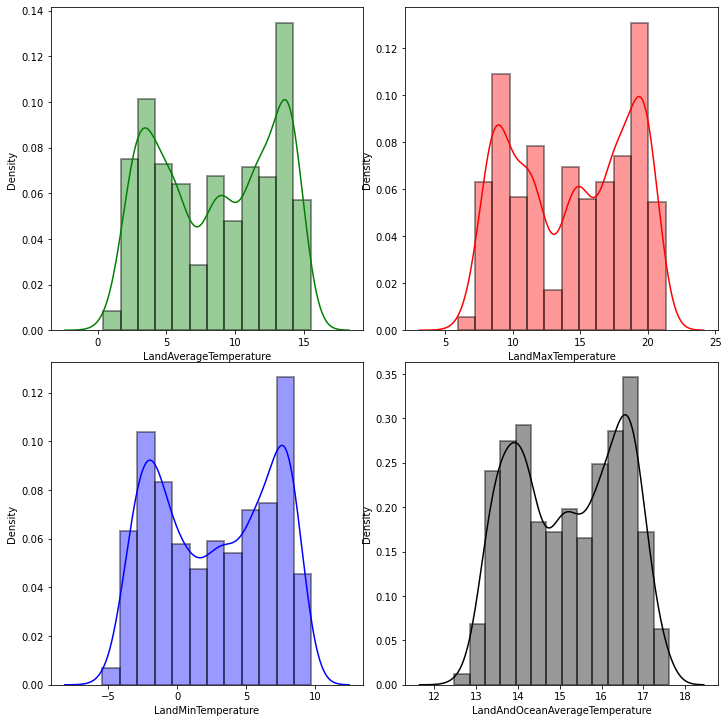

In [9]:
colors = [['g', 'r'], ['b', 'k']]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
plt.tight_layout()
data = np.reshape(col, (2, 2))

for i in range(2):
    for j in range(2):
        sns.distplot(gt[data[i][j]], ax = axes[i][j], hist_kws=dict(edgecolor= 'k', linewidth=2), color = colors[i][j])
        
fig.savefig('Output/distsubplot.png', bbox_inches = 'tight')

In [10]:
groups = gt[col[0]].groupby(pd.Grouper(freq='A'))

In [11]:
LandAverageTemperature = pd.DataFrame()
for name, group in groups:
    LandAverageTemperature[name.year] = group.values
    
LandAverageTemperature

,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.749,2.431,2.376,1.786,1.281,2.522,2.760,1.821,2.739,2.015,...,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,3.071,2.508,2.540,2.228,1.941,2.982,2.226,2.481,2.284,2.611,...,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,4.954,4.192,3.884,4.078,4.698,4.617,4.372,4.312,4.834,5.023,...,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,7.217,7.287,7.487,7.541,7.622,8.580,7.751,6.827,8.250,8.542,...,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,10.004,11.113,11.169,10.975,11.095,11.186,10.530,9.885,10.851,11.456,...,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,13.150,13.418,13.164,13.410,12.829,12.984,13.496,12.611,12.956,13.142,...,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,14.492,14.531,14.512,14.645,14.692,13.926,14.019,13.953,13.677,13.827,...,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.039,13.751,13.304,13.953,13.889,13.547,13.021,13.203,13.220,13.217,...,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,11.505,11.677,11.478,11.710,11.514,11.141,10.948,11.056,11.148,11.080,...,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,8.091,9.122,8.910,8.535,9.763,8.444,8.087,8.198,8.810,8.834,...,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


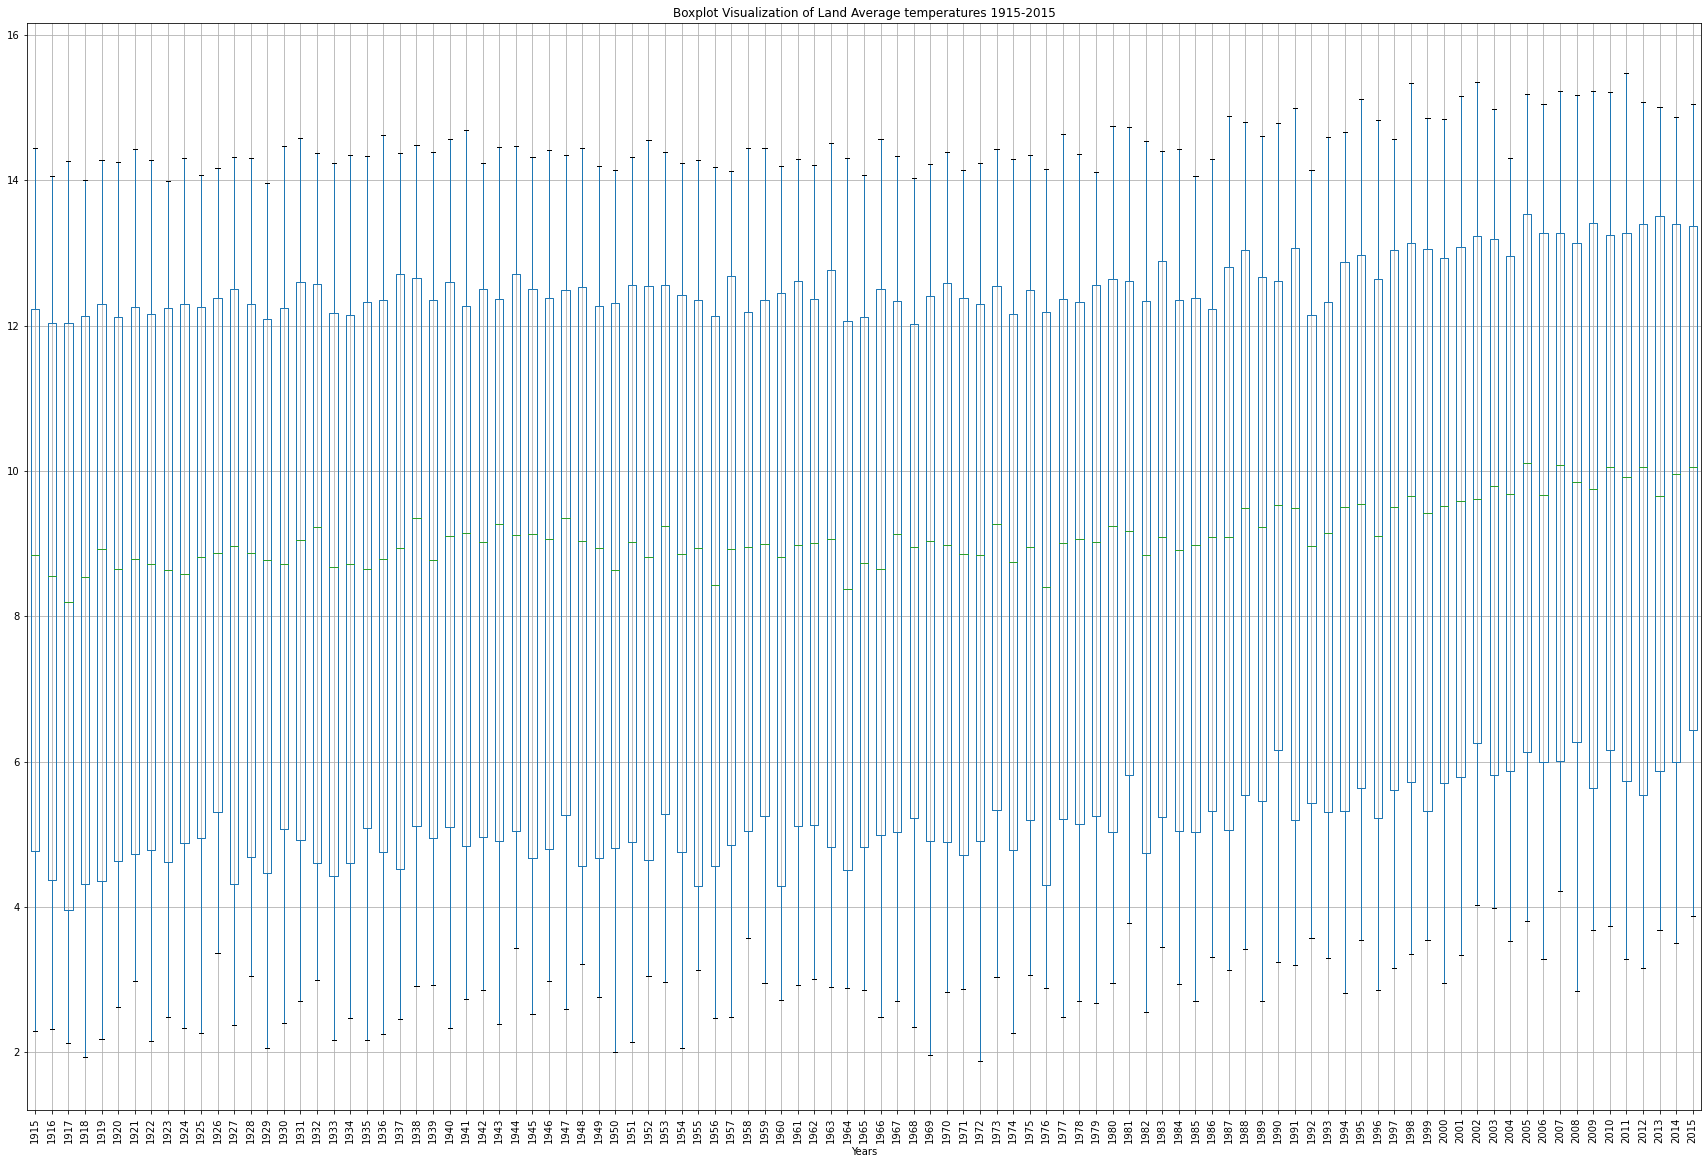

In [12]:
LandAverageTemperature[LandAverageTemperature.columns[65:]].boxplot(figsize = (30, 20))
plt.xlabel('Years')
plt.title('Boxplot Visualization of Land Average temperatures 1915-2015')
plt.xticks(rotation = 90)
plt.savefig('Output/boxplot.png', bbox_inches = 'tight')

In [13]:
groups = gt[col[3]].groupby(pd.Grouper(freq='A'))
LandAndOceanAverageTemperature = pd.DataFrame()
for name, group in groups:
    if(name.year > 2005):
        LandAndOceanAverageTemperature[name.year] = group.values

# LandAndOceanAverageTemperature.columns
LandAndOceanAverageTemperature = LandAndOceanAverageTemperature.transpose()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
LandAndOceanAverageTemperature.columns = months
LandAndOceanAverageTemperature

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2006,13.990,14.435,14.966,15.729,16.463,17.216,17.419,17.479,16.792,15.935,14.931,14.407
2007,14.417,14.408,15.017,15.930,16.629,17.168,17.485,17.339,16.737,15.867,14.821,14.110
2008,13.719,14.061,15.077,15.735,16.497,17.077,17.449,17.282,16.757,15.931,14.919,14.151
2009,14.091,14.267,14.873,15.819,16.571,17.260,17.578,17.427,16.864,15.910,14.968,14.298
2010,14.208,14.517,15.223,16.039,16.732,17.271,17.532,17.412,16.761,15.939,14.995,14.117
2011,13.928,14.193,14.880,15.832,16.523,17.203,17.568,17.475,16.762,15.873,14.799,14.198
2012,13.859,14.164,14.863,15.881,16.699,17.252,17.450,17.420,16.882,16.019,15.001,14.138
2013,14.117,14.359,14.952,15.749,16.609,17.257,17.503,17.462,16.894,15.905,15.107,14.339
2014,14.136,14.157,15.090,16.038,16.804,17.303,17.508,17.607,16.975,16.029,14.899,14.410
2015,14.255,14.564,15.193,15.962,16.774,17.390,17.611,17.589,17.049,16.290,15.252,14.774


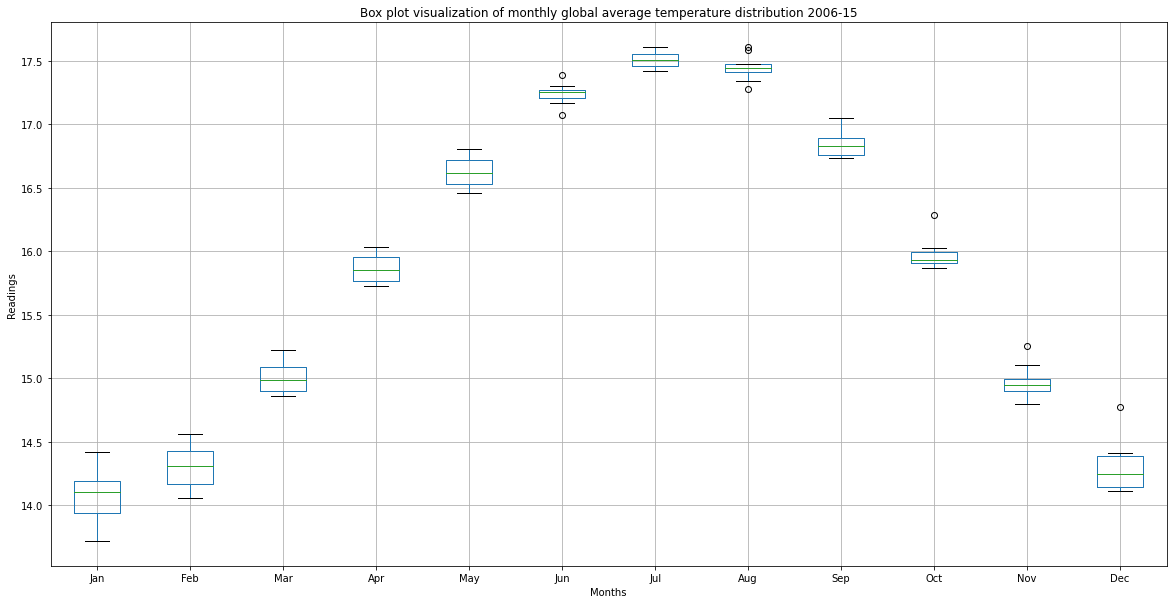

In [14]:
LandAndOceanAverageTemperature.boxplot(figsize = (20, 10))
plt.xlabel('Months')
plt.ylabel('Readings')
plt.title('Box plot visualization of monthly global average temperature distribution 2006-15')
plt.savefig('Output/monthlyboxplot.png', bbox_inches = 'tight')

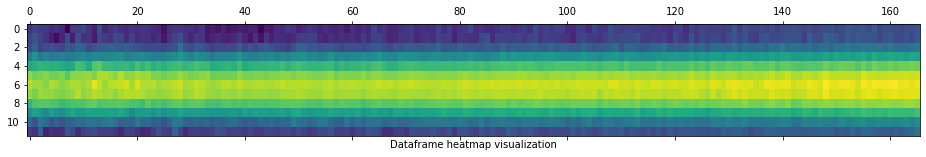

In [15]:
groups = gt[col[2]].groupby(pd.Grouper(freq='A'))
LandMinTemperature = pd.DataFrame()
for name, group in groups:
    LandMinTemperature[name.year] = group.values
# years = years.T
plt.matshow(LandMinTemperature, interpolation=None, aspect='auto')
plt.xlabel('Dataframe heatmap visualization')
plt.savefig('Output/matviz.png', bbox_inches = 'tight')

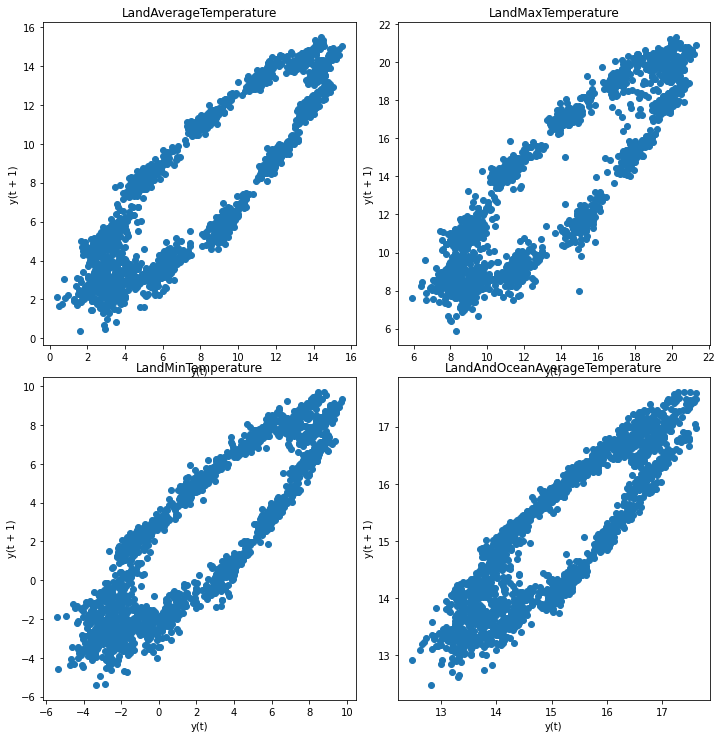

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
plt.tight_layout()
pd.plotting.lag_plot(gt[col[0]], ax = axes[0][0])
axes[0][0].set_title('LandAverageTemperature')
pd.plotting.lag_plot(gt[col[1]], ax = axes[0][1])
axes[0][1].set_title('LandMaxTemperature')
pd.plotting.lag_plot(gt[col[2]], ax = axes[1][0])
axes[1][0].set_title('LandMinTemperature')
pd.plotting.lag_plot(gt[col[3]], ax = axes[1][1])
axes[1][1].set_title('LandAndOceanAverageTemperature')
plt.savefig('Output/lagplot.png')

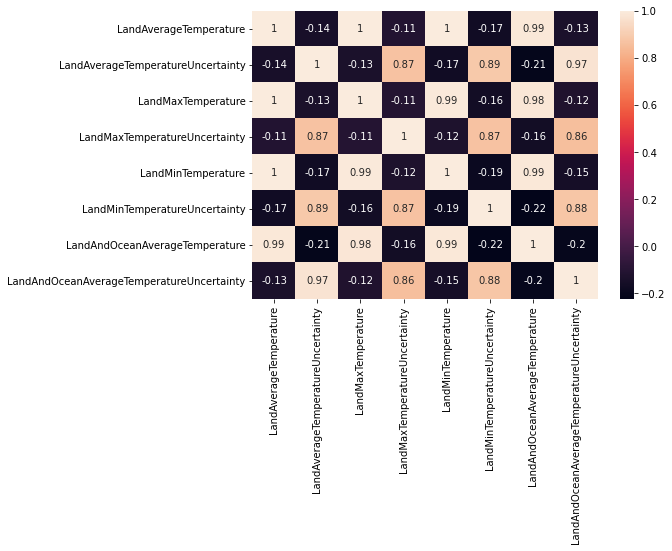

In [17]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(gt.corr(), annot=True)
fig.savefig('Output/correlation_heatmap.png', bbox_inches = 'tight')

In [18]:
y = gt[col[0]]
y

dt
1850-01-01     0.749
1850-02-01     3.071
1850-03-01     4.954
1850-04-01     7.217
1850-05-01    10.004
               ...  
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, Length: 1992, dtype: float64

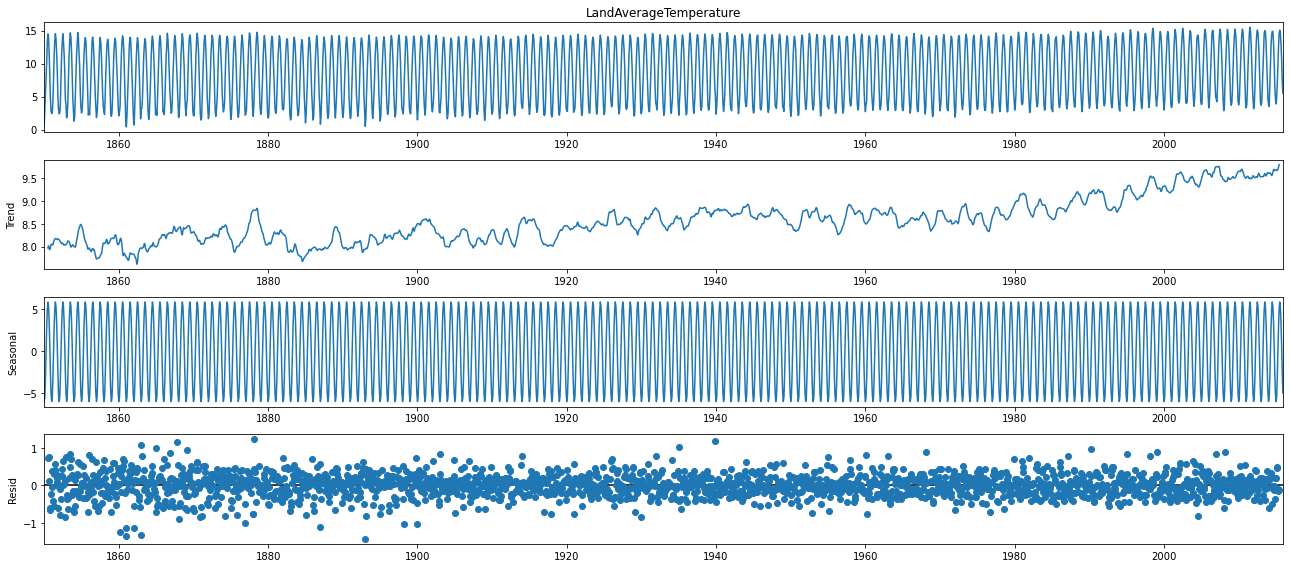

In [19]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# tsa = time series analysis
fig = decomposition.plot()
fig.savefig('Output/decomposition.png')

# CHECKING FOR STATIONARITY

In [20]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


In [21]:
df1, df2 = gt[0:996], gt[996:]
m1, m2 = df1.mean(), df2.mean()
v1, v2 = df1.var(), df2.var()
mv = pd.DataFrame([m1, m2, v1, v2])
mv = mv.T
mv.columns = ['m1', 'm2', 'v1', 'v2']
mv

,m1,m2,v1,v2
LandAverageTemperature,8.226579,8.916586,18.727349,17.402247
LandAverageTemperatureUncertainty,0.426654,0.126672,0.050657,0.004732
LandMaxTemperature,14.058812,14.642390,18.736234,18.256921
LandMaxTemperatureUncertainty,0.804700,0.154863,0.465170,0.004067
LandMinTemperature,2.254853,3.232337,17.439677,16.641398
LandMinTemperatureUncertainty,0.693799,0.169899,0.255107,0.005262
LandAndOceanAverageTemperature,14.981343,15.443788,1.596759,1.544463
LandAndOceanAverageTemperatureUncertainty,0.180838,0.076226,0.004589,0.000769


In [22]:
# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, 
#     meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, 
#     meaning it is stationary. It does not have time-dependent structure.
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

from statsmodels.tsa.stattools import adfuller
X = gt[col[0]].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# time series is non stationary

ADF Statistic: -1.455328
p-value: 0.555483
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [23]:
# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).
# Test for stationarity: If the test statistic is greater than the critical value, 
#     we reject the null hypothesis (series is not stationary). If the test statistic is 
#     less than the critical value, if fail to reject the null hypothesis (series is stationary). 


from statsmodels.tsa.stattools import kpss
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
# series is non-stationary

KPSS Statistic: 3.207645
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\S K Nayak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\S K Nayak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


# CONVERTING NON-STATIONARY TIME SERIES TO STATIONARY

## LOG TRANSFORM AND DIFFERENCING

<AxesSubplot:xlabel='dt'>

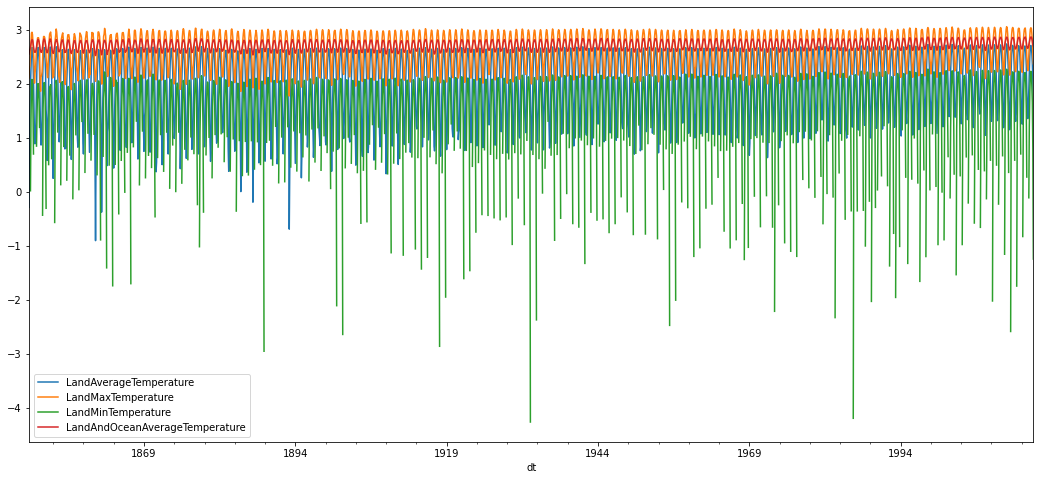

In [24]:
gt1 = np.log(gt)
gt1[col].plot()

# ARIMA

In [25]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14648.232239910618
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12071.555258261513
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2711.9692421673435
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1718.8843462953255
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2726.5248355473323
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1710.9350330242537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2159.4236375924247
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1718.1731216461167
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12086.072037326965
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9796.85061265639
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2498.3039225424327
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1455.4123293957398
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2517.9985894075
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1449.247169941174
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1923.546053568043
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1456.2365366766528
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8834.845000426783
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6933.155112353311
A

In [28]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3231      0.020     16.349      0.000       0.284       0.362
ma.L1         -0.9534      0.008   -116.587      0.000      -0.969      -0.937
ar.S.L12       0.0023      0.019      0.118      0.906      -0.036       0.040
ma.S.L12      -0.9568      0.008   -118.122      0.000      -0.973      -0.941
sigma2         0.1106      0.003     42.930      0.000       0.106       0.116


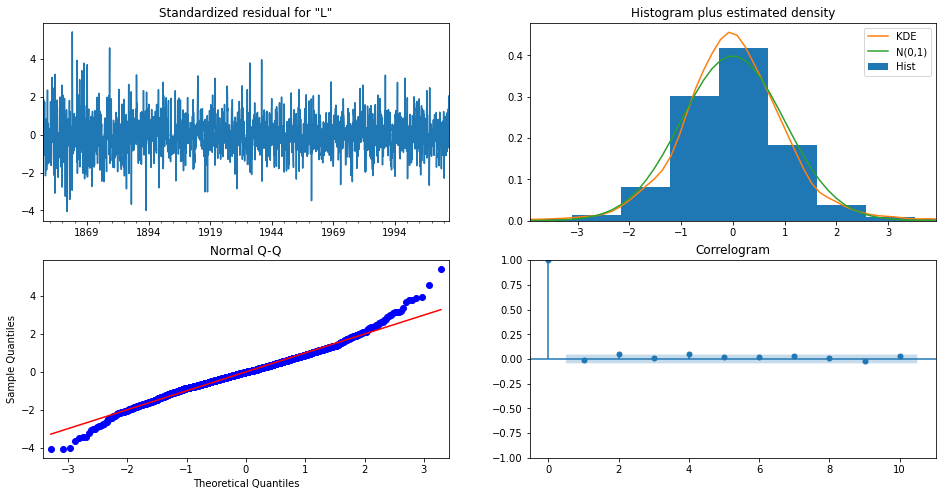

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('Output/arima-stationtrue.png', bbox_inches = 'tight')

In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3232      0.020     16.550      0.000       0.285       0.361
ma.L1         -0.9514      0.008   -117.025      0.000      -0.967      -0.935
ar.S.L12       0.0008      0.000      1.833      0.067   -5.51e-05       0.002
ma.S.L12      -0.9564      0.008   -125.238      0.000      -0.971      -0.941
sigma2         0.1089      0.003     42.791      0.000       0.104       0.114


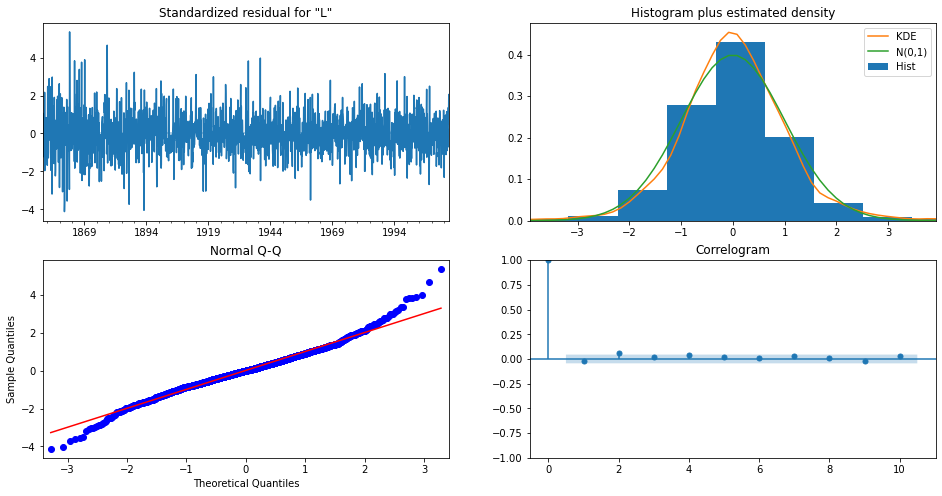

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('Output/arima-stationfalse.png', bbox_inches = 'tight')

In [32]:
LandAverageTemperature[LandAverageTemperature.columns[150:]]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,2.950,3.336,4.026,3.981,3.525,3.808,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,4.184,3.720,4.704,4.085,4.499,3.920,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,6.219,6.208,6.772,6.048,6.321,6.544,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,9.552,9.245,9.229,9.154,9.249,9.618,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,11.874,12.271,12.248,12.153,11.571,12.226,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,14.060,14.110,14.084,14.017,13.889,14.476,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,14.848,15.161,15.354,14.983,14.312,15.190,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.519,14.427,14.560,14.691,14.188,14.510,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,12.547,12.736,12.950,12.911,12.642,13.217,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,9.486,9.935,9.988,10.424,10.127,10.601,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


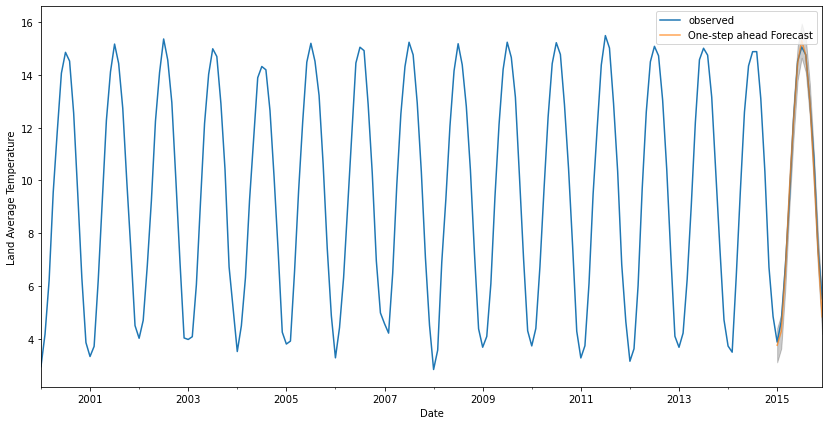

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Land Average Temperature')
plt.legend()

plt.savefig('Output/forecast.png')

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.09
